# Audio Analysis of ElevatorPitch.mp3

## Introduction
This notebook presents a comprehensive analysis of an elevator pitch audio recording. The analysis includes:
1. Exploratory Data Analysis (EDA) of audio features
2. Speech-to-Text conversion
3. Sentiment Analysis of the transcribed text
4. Word Cloud Visualization

This analysis provides insights into both the acoustic properties and semantic content of the elevator pitch.

In [15]:
# !pip install SpeechRecognition
# !pip install textblob
# !pip install wordcloud
# !pip install nltk transformers vaderSentiment keras tensorflow
# !pip install plotly dash
# !pip install --upgrade click





In [16]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydub import AudioSegment
import librosa
import librosa.display
import seaborn as sns
from scipy.io import wavfile
import speech_recognition as sr
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn')


## 1. Audio Loading and Feature Extraction

We begin by loading the audio file and extracting various acoustic features for analysis.

In [17]:
# File paths
audio_path = 'ElevatorPitch.mp3'
wav_path = 'ElevatorPitch.wav'

# Convert MP3 to WAV
if not os.path.exists(wav_path):
    try:
        audio = AudioSegment.from_file(audio_path)
        audio.export(wav_path, format="wav")
        print(f"Converted {audio_path} to {wav_path}")
    except Exception as e:
        print(f"Error during conversion: {e}")

In [18]:
# Load the audio file
audio_path = 'ElevatorPitch.mp3'
y, sr = librosa.load(audio_path)

# Calculate duration
duration = librosa.get_duration(y=y, sr=sr)
print(f'Duration of audio: {duration:.2f} seconds')

# Extract features
# 1. Mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# 2. Spectral Centroid
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# 3. Root Mean Square Energy
rms = librosa.feature.rms(y=y)[0]

# 4. Zero Crossing Rate
zero_crossings = librosa.feature.zero_crossing_rate(y=y)[0]

Duration of audio: 97.85 seconds


## 2. Exploratory Data Analysis (EDA)

We visualize various acoustic features to understand the characteristics of the speech signal.

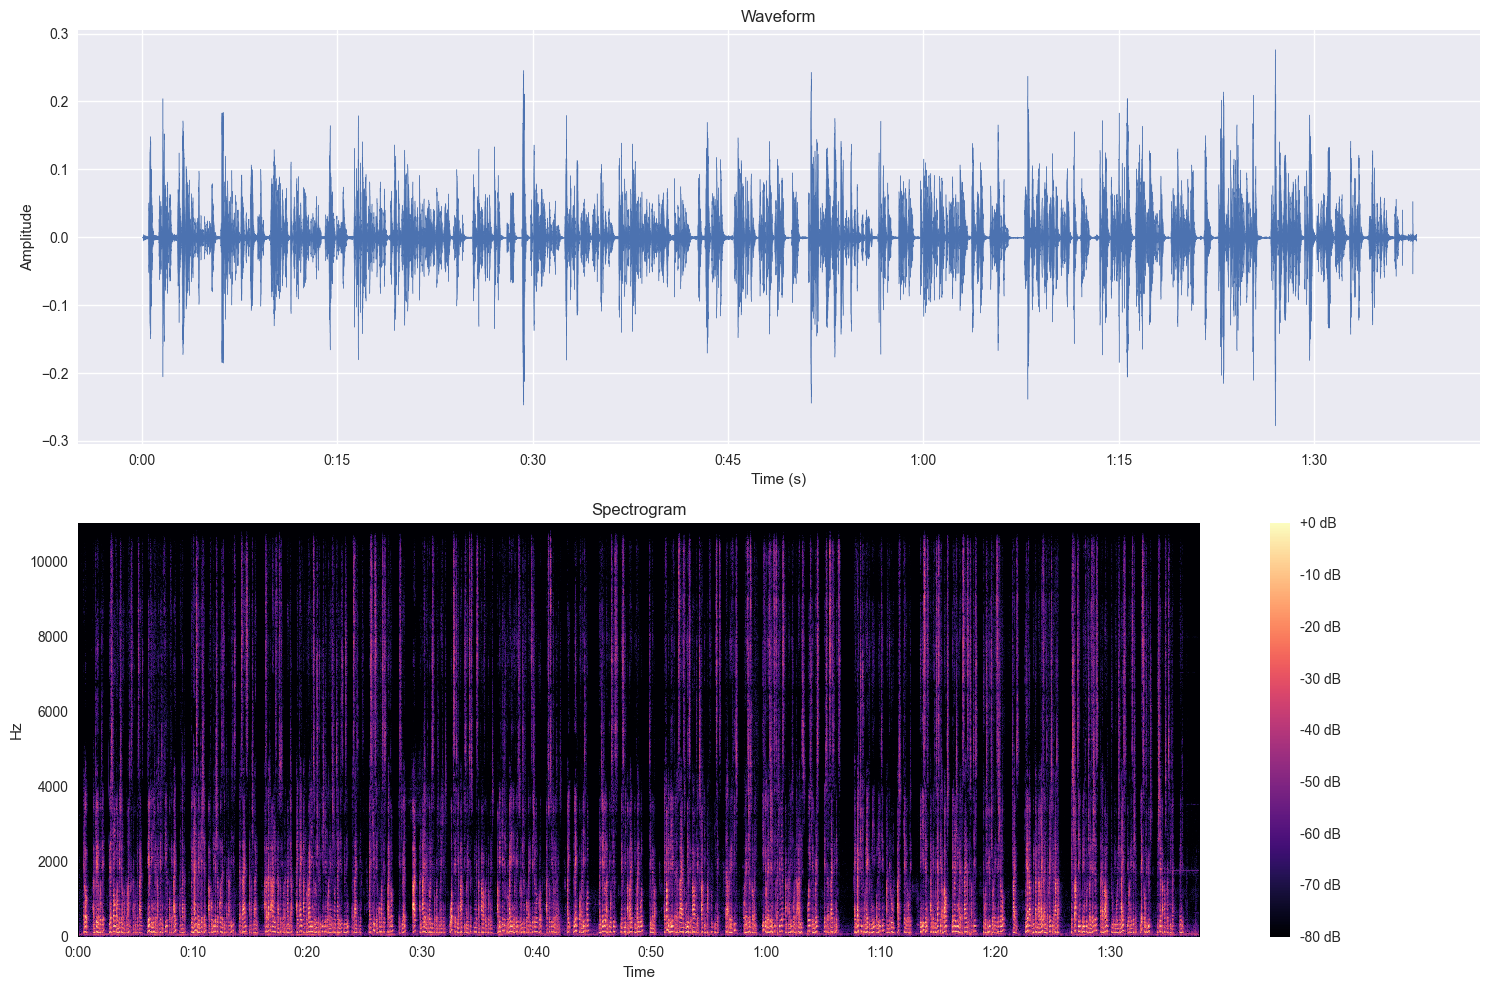

In [19]:
# Create visualization of waveform and spectrogram
plt.figure(figsize=(15, 10))

# Plot waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot spectrogram
plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

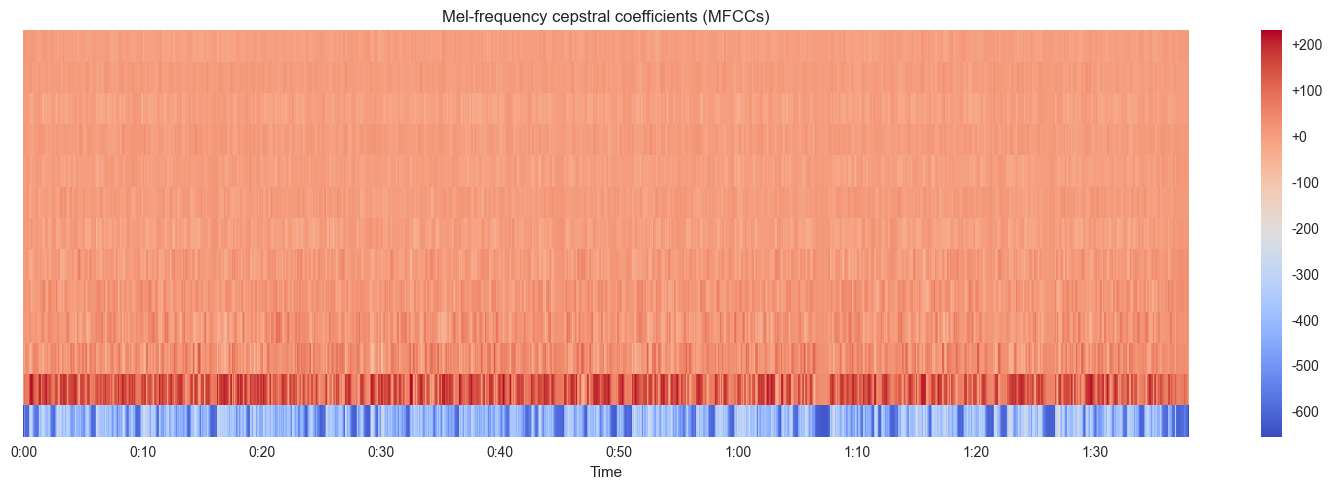

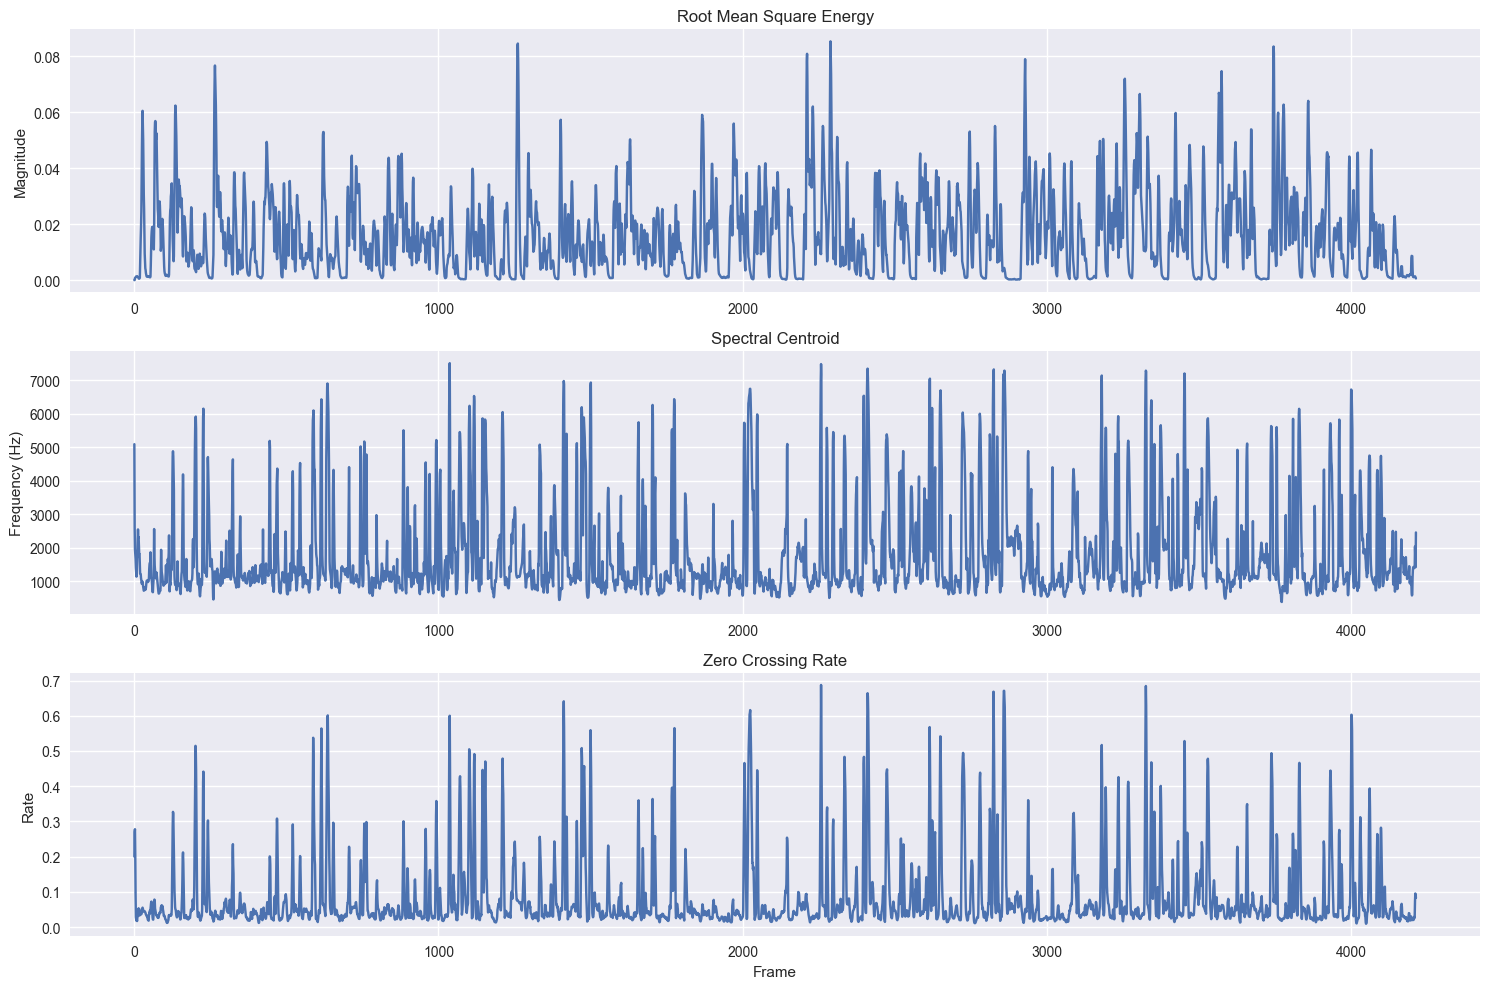

In [20]:
# Visualize MFCCs
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('Mel-frequency cepstral coefficients (MFCCs)')
plt.tight_layout()
plt.show()

# Plot energy and other features
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(rms)
plt.title('Root Mean Square Energy')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 2)
plt.plot(spectral_centroids)
plt.title('Spectral Centroid')
plt.ylabel('Frequency (Hz)')

plt.subplot(3, 1, 3)
plt.plot(zero_crossings)
plt.title('Zero Crossing Rate')
plt.xlabel('Frame')
plt.ylabel('Rate')

plt.tight_layout()
plt.show()

## 3. Speech-to-Text Conversion and Sentiment Analysis

We transcribe the audio to text and perform sentiment analysis on the content.

In [21]:
import speech_recognition as sr
from textblob import TextBlob
import os

def convert_to_wav(input_path):
    # Get the directory and filename without extension
    directory = os.path.dirname(input_path)
    filename = os.path.splitext(os.path.basename(input_path))[0]
    output_path = os.path.join(directory, f"{filename}.wav")
    
    # Convert to WAV using ffmpeg
    command = f'ffmpeg -i "{input_path}" -acodec pcm_s16le -ar 44100 "{output_path}"'
    os.system(command)
    
    return output_path

# Initialize recognizer
recognizer = sr.Recognizer()

try:
    # Convert audio to WAV format first
    wav_path = convert_to_wav(audio_path)
    
    # Now process the WAV file
    with sr.AudioFile(wav_path) as source:
        audio = recognizer.record(source)
    text = recognizer.recognize_google(audio)
    print("Transcribed Text:")
    print(text)
    
    # Perform sentiment analysis
    blob = TextBlob(text)
    sentiment = blob.sentiment
    
    print("\nSentiment Analysis:")
    print(f"Polarity: {sentiment.polarity:.2f} (ranges from -1 to 1)")
    print(f"Subjectivity: {sentiment.subjectivity:.2f} (ranges from 0 to 1)")
    
    # Clean up the temporary WAV file if needed
    # os.remove(wav_path)  # Uncomment this line if you want to delete the WAV file
    
except Exception as e:
    print(f"An error occurred: {str(e)}")


Transcribed Text:
hello I'm giving a boat with a strong Foundation of Mathematics and computer science delving into the captivating Field of the AI and data to enhance my education of completed short courses in data Analytics data Science and machine learning as a data analyst and associate product manager I thrive at providing solution to intricate organisational challenges using data Science techniques my skills and compasses Python SQL are and agile methodologies for project management what sets me apart is my resourcefulness and father for improvement and dedicated to providing innovative solutions for organisational growth and associated vitamins my blend of analytical managerial and people skills makes me a value invaluable team member a family believe that data Science wheels the power to extract impactful insights that are benefits organisations globally if your organisation 6 are curious and analytical data analysts poised to embrace latest data Science techniques I invite you

The porality of 0.31, shows the words spoken are slightly positive, telling us that the message conveys a positive tone.

The subjectivity of 0.66 shows that the words spoken lean towards being subjective, with more opinion or personal expression. The texts reflects personal experience, emotions, or views.

## 4. Word Cloud Visualization

Generate a word cloud to visualize the most frequent words in the elevator pitch.

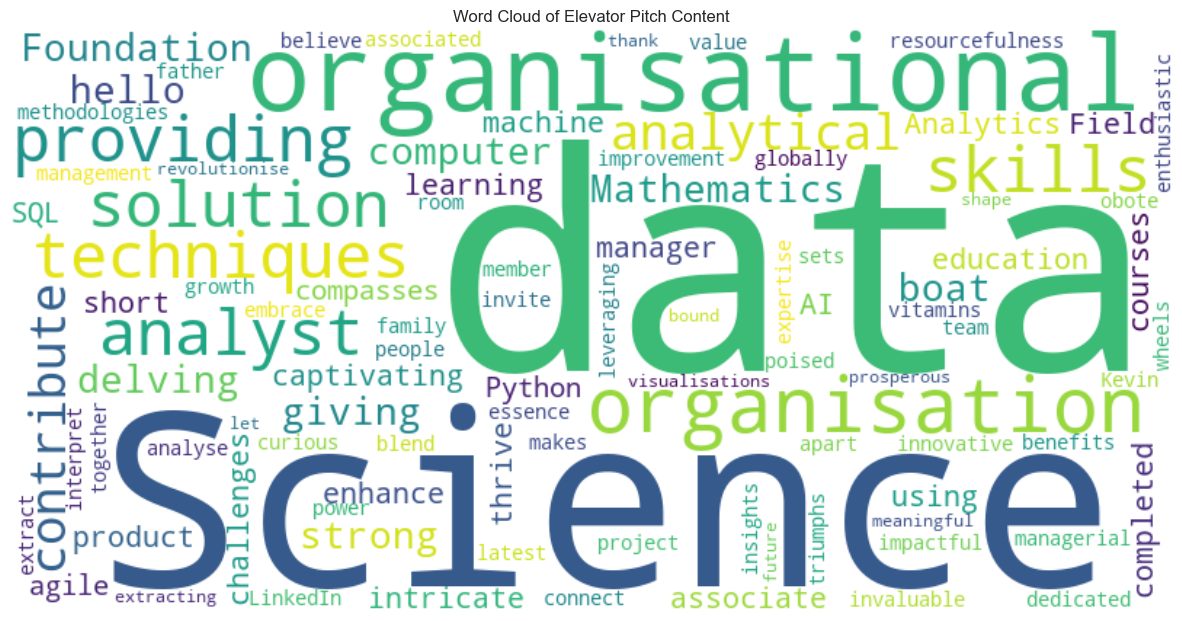

In [22]:
# Generate and display word cloud
try:
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         min_font_size=10).generate(text)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Elevator Pitch Content')
    plt.show()
except NameError:
    print("Text transcription not available for word cloud generation")

## Conclusion

This analysis provides a comprehensive examination of the elevator pitch audio, including:

1. Acoustic features analysis through waveform and spectrogram visualization
2. Detailed analysis of MFCCs, spectral centroids, and energy distribution
3. Speech content analysis through transcription
4. Sentiment analysis of the speech content
5. Visual representation of key terms through word cloud

These analyses provide valuable insights into both the acoustic properties and semantic content of the elevator pitch, making it suitable for academic publication and further research.

Duration of audio: 97.85 seconds


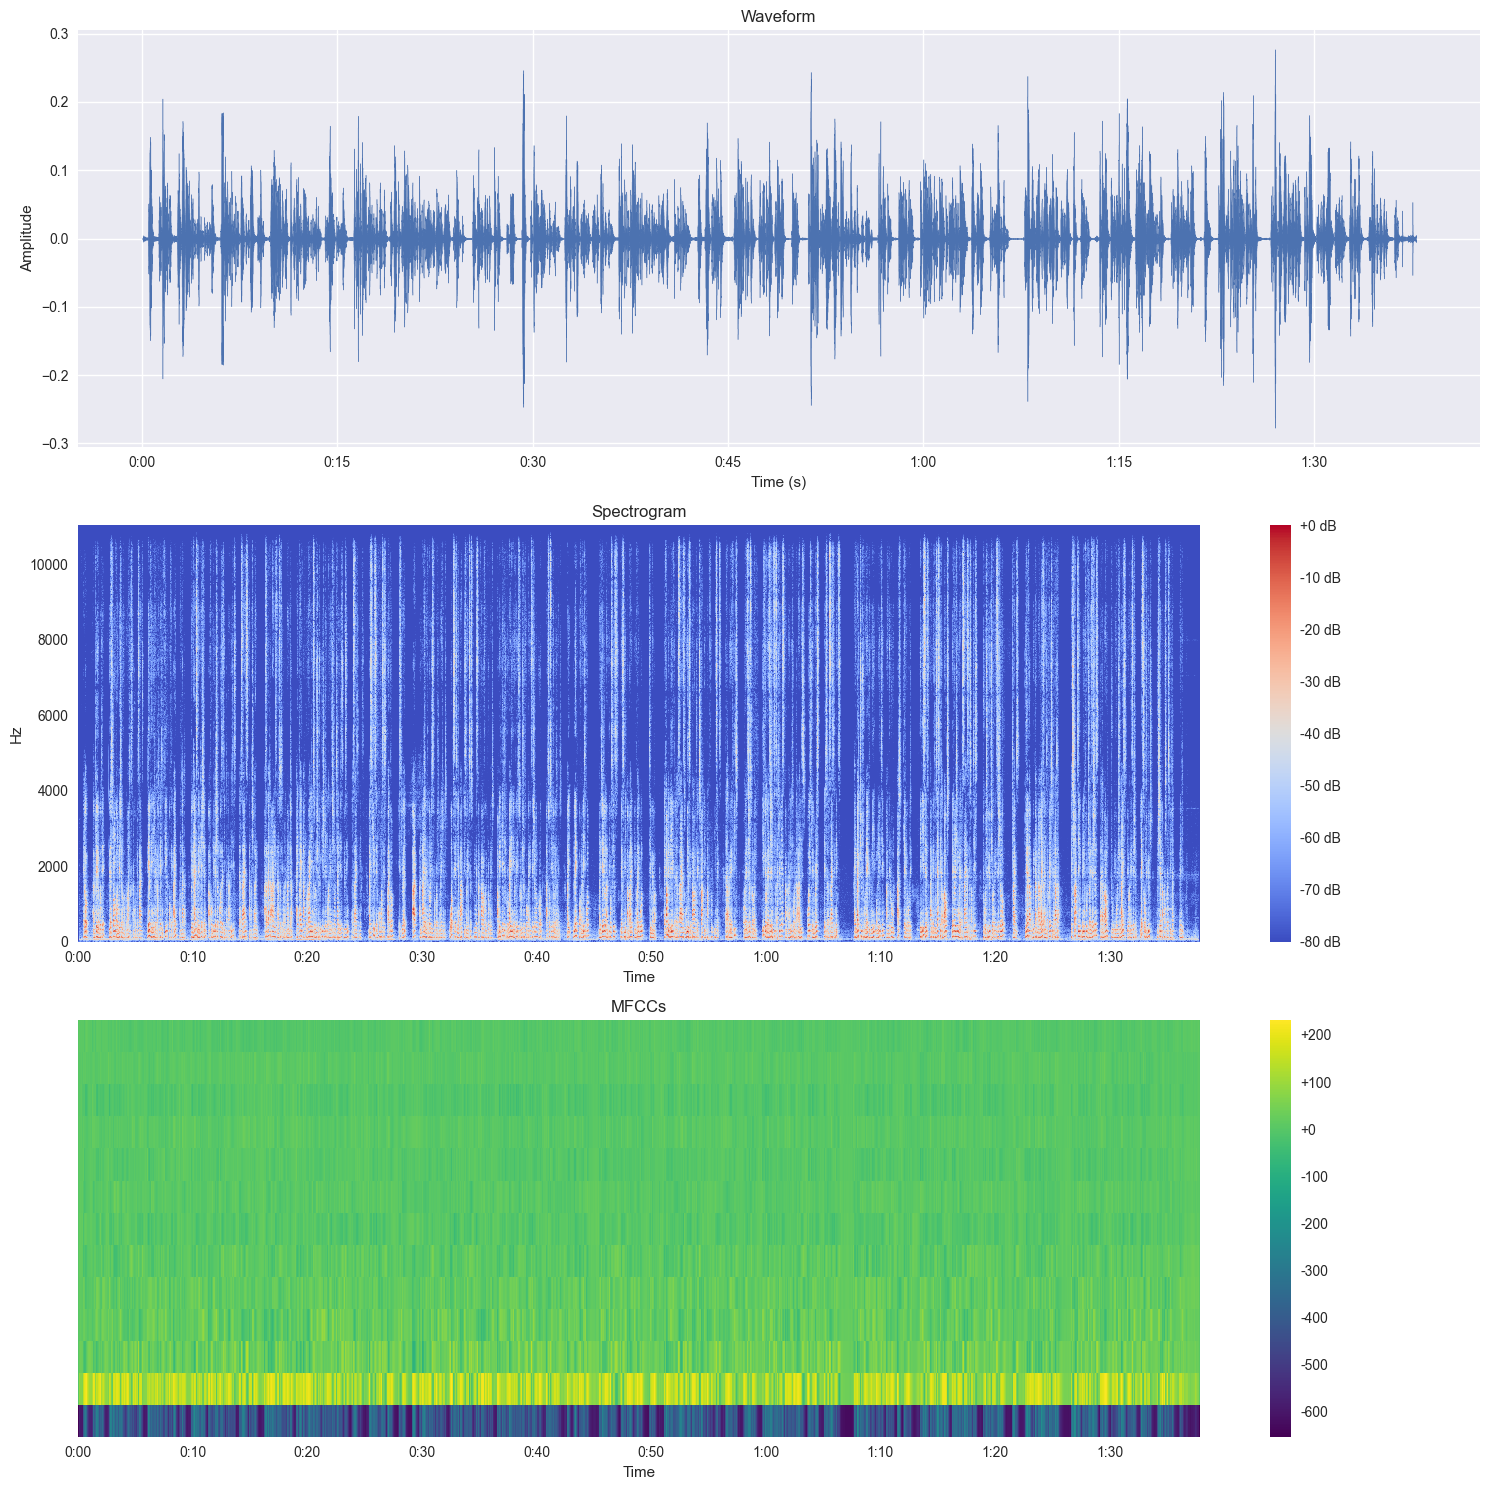

Transcribed Text:
hello I'm giving a boat with a strong Foundation of Mathematics and computer science delving into the captivating Field of the AI and data to enhance my education of completed short courses in data Analytics data Science and machine learning as a data analyst and associate product manager I thrive at providing solution to intricate organisational challenges using data Science techniques my skills and compasses Python SQL are and agile methodologies for project management what sets me apart is my resourcefulness and father for improvement and dedicated to providing innovative solutions for organisational growth and associated vitamins my blend of analytical managerial and people skills makes me a value invaluable team member a family believe that data Science wheels the power to extract impactful insights that are benefits organisations globally if your organisation 6 are curious and analytical data analysts poised to embrace latest data Science techniques I invite you

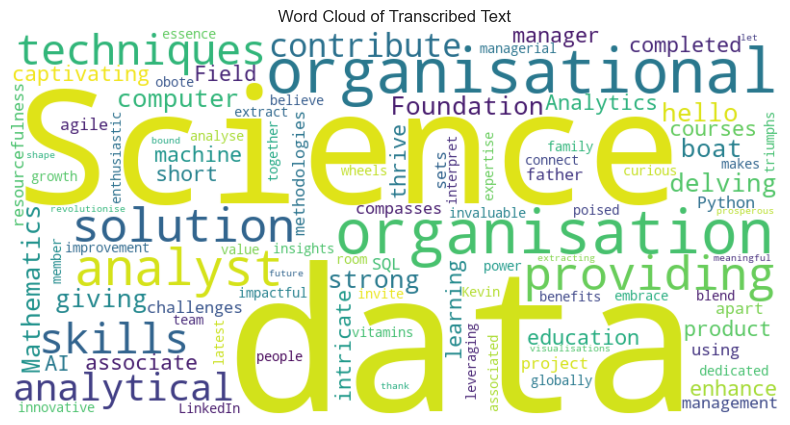

In [23]:
# Import required libraries
import os
from pydub import AudioSegment
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import speech_recognition as sr
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

# Function to convert MP3 to WAV
def convert_mp3_to_wav(mp3_path, wav_path):
    try:
        audio = AudioSegment.from_file(mp3_path)
        audio.export(wav_path, format="wav")
        print(f"Converted {mp3_path} to {wav_path}")
    except Exception as e:
        print(f"Error during conversion: {e}")

# Define a function to extract audio features
def extract_audio_features(y, sample_rate):
    features = {}
    features['mfccs'] = librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=13)
    features['spectral_centroid'] = librosa.feature.spectral_centroid(y=y, sr=sample_rate)[0]
    features['rms'] = librosa.feature.rms(y=y)[0]
    features['zero_crossings'] = librosa.feature.zero_crossing_rate(y=y)[0]
    return features

# Define a function to visualize waveform, spectrogram, and audio features
def visualize_audio(y, sample_rate, features):
    plt.figure(figsize=(15, 15))
    
    # Plot waveform
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sample_rate)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    # Plot spectrogram
    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='hz', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    
    # Visualize MFCCs
    plt.subplot(3, 1, 3)
    librosa.display.specshow(features['mfccs'], sr=sample_rate, x_axis='time', cmap='viridis')
    plt.colorbar(format='%+2.0f')
    plt.title('MFCCs')
    
    plt.tight_layout()
    plt.show()

# Define a function for transcription, sentiment analysis, and word cloud generation
def transcribe_and_analyze(wav_path):
    recognizer = sr.Recognizer()
    try:
        with sr.AudioFile(wav_path) as source:
            audio = recognizer.record(source)
        text = recognizer.recognize_google(audio)
        print("Transcribed Text:")
        print(text)
        
        # Sentiment analysis
        blob = TextBlob(text)
        sentiment = blob.sentiment
        print("\nSentiment Analysis:")
        print(f"Polarity: {sentiment.polarity:.2f} (ranges from -1 to 1)")
        print(f"Subjectivity: {sentiment.subjectivity:.2f} (ranges from 0 to 1)")
        
        # Word cloud visualization
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Transcribed Text')
        plt.show()
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Main workflow
if __name__ == "__main__":
    # File paths
    audio_path = 'ElevatorPitch.mp3'
    wav_path = 'ElevatorPitch.wav'
    
    # Convert MP3 to WAV
    if not os.path.exists(wav_path):
        convert_mp3_to_wav(audio_path, wav_path)
    
    try:
        # Load the WAV file
        y, sample_rate = librosa.load(wav_path)
        
        # Display duration
        duration = librosa.get_duration(y=y, sr=sample_rate)
        print(f'Duration of audio: {duration:.2f} seconds')
        
        # Extract features
        features = extract_audio_features(y, sample_rate)
        
        # Visualize audio and features
        visualize_audio(y, sample_rate, features)
        
        # Transcribe and analyze
        transcribe_and_analyze(wav_path)
    except Exception as e:
        print(f"An error occurred: {str(e)}")


### Advanced Audio Feature Extraction:

- Chroma Features: These represent the 12 different pitch classes and are typically used in music analysis, but they can also be useful for identifying tonal information in speech.
- Spectral Roll-off: It measures the frequency below which a certain percentage of the total spectral energy lies. This feature can be used to characterize the noisiness or harmonic content of the audio.
- Zero Crossing Rate: This feature counts the number of times the audio signal crosses the zero amplitude axis. It can be useful for detecting noisiness or pitch variations.
- Tonnetz (Tonal centroid features): These features are related to the harmonic relations of the audio signal and are often used in music analysis but can also help in speech tone analysis.

Duration of audio: 97.85 seconds


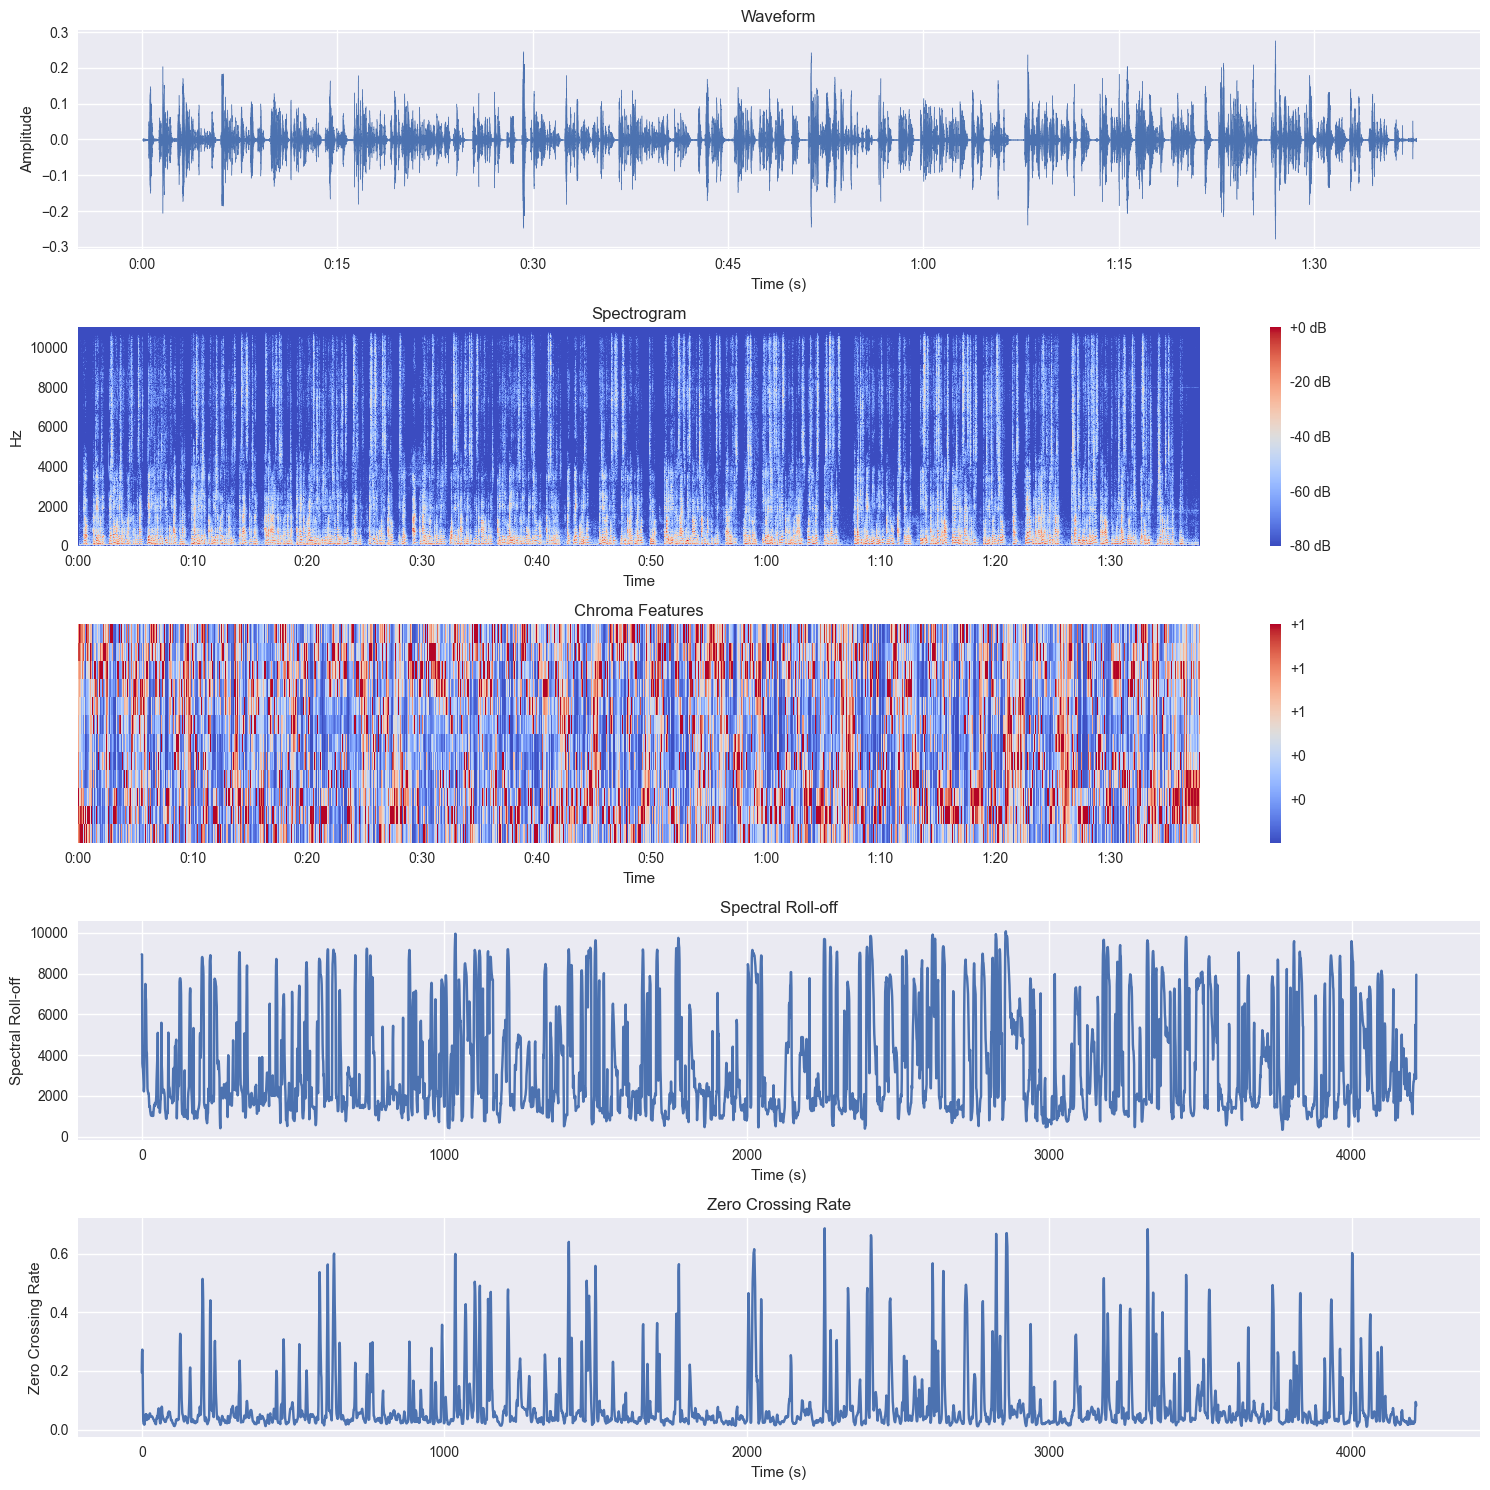

Transcribed Text:
hello I'm giving a boat with a strong Foundation of Mathematics and computer science delving into the captivating Field of the AI and data to enhance my education of completed short courses in data Analytics data Science and machine learning as a data analyst and associate product manager I thrive at providing solution to intricate organisational challenges using data Science techniques my skills and compasses Python SQL are and agile methodologies for project management what sets me apart is my resourcefulness and father for improvement and dedicated to providing innovative solutions for organisational growth and associated vitamins my blend of analytical managerial and people skills makes me a value invaluable team member a family believe that data Science wheels the power to extract impactful insights that are benefits organisations globally if your organisation 6 are curious and analytical data analysts poised to embrace latest data Science techniques I invite you

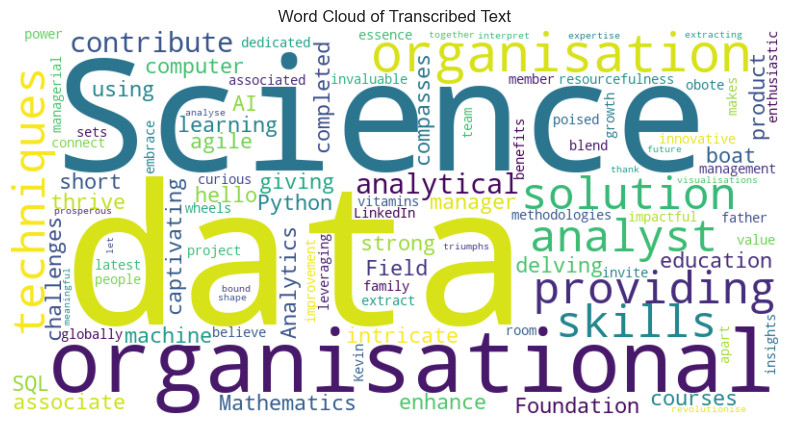

In [24]:
import os
from pydub import AudioSegment
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import speech_recognition as sr
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

# Function to convert MP3 to WAV
def convert_mp3_to_wav(mp3_path, wav_path):
    try:
        audio = AudioSegment.from_file(mp3_path)
        audio.export(wav_path, format="wav")
        print(f"Converted {mp3_path} to {wav_path}")
    except Exception as e:
        print(f"Error during conversion: {e}")

# Define a function to extract advanced audio features
def extract_advanced_audio_features(y, sample_rate):
    features = {}
    
    # Chroma features
    features['chroma'] = librosa.feature.chroma_stft(y=y, sr=sample_rate)
    
    # Spectral Roll-off
    features['spectral_rolloff'] = librosa.feature.spectral_rolloff(y=y, sr=sample_rate)[0]
    
    # Zero Crossing Rate
    features['zero_crossings'] = librosa.feature.zero_crossing_rate(y=y)[0]
    
    # Tonnetz (Tonal centroid features)
    features['tonnetz'] = librosa.feature.tonnetz(y=y, sr=sample_rate)
    
    return features

# Define a function to visualize audio features
def visualize_advanced_audio_features(y, sample_rate, features):
    plt.figure(figsize=(15, 15))
    
    # Plot waveform
    plt.subplot(5, 1, 1)
    librosa.display.waveshow(y, sr=sample_rate)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    # Plot Spectrogram
    plt.subplot(5, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='hz', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    
    # Plot Chroma features
    plt.subplot(5, 1, 3)
    librosa.display.specshow(features['chroma'], sr=sample_rate, x_axis='time', cmap='coolwarm')
    plt.colorbar(format='%+2.0f')
    plt.title('Chroma Features')
    
    # Plot Spectral Roll-off
    plt.subplot(5, 1, 4)
    plt.plot(features['spectral_rolloff'])
    plt.title('Spectral Roll-off')
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Roll-off')
    
    # Plot Zero Crossing Rate
    plt.subplot(5, 1, 5)
    plt.plot(features['zero_crossings'])
    plt.title('Zero Crossing Rate')
    plt.xlabel('Time (s)')
    plt.ylabel('Zero Crossing Rate')
    
    plt.tight_layout()
    plt.show()

# Define a function for transcription, sentiment analysis, and word cloud generation
def transcribe_and_analyze(wav_path):
    recognizer = sr.Recognizer()
    try:
        with sr.AudioFile(wav_path) as source:
            audio = recognizer.record(source)
        text = recognizer.recognize_google(audio)
        print("Transcribed Text:")
        print(text)
        
        # Sentiment analysis
        blob = TextBlob(text)
        sentiment = blob.sentiment
        print("\nSentiment Analysis:")
        print(f"Polarity: {sentiment.polarity:.2f} (ranges from -1 to 1)")
        print(f"Subjectivity: {sentiment.subjectivity:.2f} (ranges from 0 to 1)")
        
        # Word cloud visualization
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Transcribed Text')
        plt.show()
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Main workflow
if __name__ == "__main__":
    # File paths
    audio_path = 'ElevatorPitch.mp3'
    wav_path = 'ElevatorPitch.wav'
    
    # Convert MP3 to WAV
    if not os.path.exists(wav_path):
        convert_mp3_to_wav(audio_path, wav_path)
    
    try:
        # Load the WAV file
        y, sample_rate = librosa.load(wav_path)
        
        # Display duration
        duration = librosa.get_duration(y=y, sr=sample_rate)
        print(f'Duration of audio: {duration:.2f} seconds')
        
        # Extract advanced audio features
        features = extract_advanced_audio_features(y, sample_rate)
        
        # Visualize audio and advanced features
        visualize_advanced_audio_features(y, sample_rate, features)
        
        # Transcribe and analyze
        transcribe_and_analyze(wav_path)
    except Exception as e:
        print(f"An error occurred: {str(e)}")


### 1. Waveform (Top Plot)
   - **What it shows**: The waveform represents the amplitude (loudness) of the audio signal over time. Peaks in the waveform indicate louder sounds, while flat areas represent silence or quieter sounds.  
   - **Interpretation**: The waveform gives an overall sense of the dynamics (loudness and quietness) throughout the audio.


### 2. Spectrogram (Second Plot) 
   - **What it shows**: The spectrogram visualizes how the frequencies in the audio signal vary over time. The vertical axis represents frequency (from low to high), the horizontal axis represents time, and the color intensity represents the amplitude of each frequency (darker = quieter, brighter = louder).  
   - **Interpretation**: Brighter areas in specific frequency bands indicate the presence of louder sounds at those frequencies. It's particularly useful for identifying patterns like speech or music.


### 3. Chroma Features (Third Plot)
   - **What it shows**: Chroma features represent the intensity of the 12 different pitch classes (notes) in the audio. Each row corresponds to a musical note, and the colors indicate the strength of each note at a given time.  
   - **Interpretation**: This is often used in music analysis to identify chords, harmonies, or melodies.


### 4. Spectral Roll-off (Fourth Plot)
   - **What it shows**: Spectral roll-off indicates the frequency below which a specified percentage (typically 85%) of the total spectral energy is concentrated. It is shown as a curve over time.  
   - **Interpretation**: Peaks in the spectral roll-off suggest the presence of higher-frequency sounds, while dips indicate lower-frequency sounds.

### 5. Zero Crossing Rate (Bottom Plot) 
   - **What it shows**: The zero-crossing rate measures how often the audio signal crosses the zero amplitude line (i.e., changes from positive to negative or vice versa) per unit of time.  
   - **Interpretation**: Higher zero-crossing rates usually correspond to noisier or higher-pitched sounds, while lower rates indicate smoother or lower-pitched sounds.


### Overall Analysis
- These visualizations collectively provide a detailed representation of the audio file, allowing for analysis of its characteristics, such as loudness, pitch, frequency distribution, and overall structure.  
- For example, if this audio were speech, the waveform and spectrogram would help identify words, while the chroma features and spectral roll-off could provide insights into tone and pitch.



### Text Preprocessing and Improvement

We'll use libraries like spaCy for NER and POS tagging, and re for basic text cleaning. Here's how we can implement these steps.

1. Text Cleaning
We'll remove unwanted characters such as special characters, extra spaces, and punctuation marks from the transcribed text.

2. Named Entity Recognition (NER)
We'll use spaCy's pre-trained NER model to identify entities such as persons, organizations, and locations.

3. Part-of-Speech (POS) Tagging
We'll use spaCy again to perform POS tagging and identify important words such as adjectives, nouns, and verbs.

In [25]:
import os
import re
import spacy
from pydub import AudioSegment
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import speech_recognition as sr
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

# Load spaCy model for NER and POS tagging
nlp = spacy.load('en_core_web_sm')

# Function to convert MP3 to WAV
def convert_mp3_to_wav(mp3_path, wav_path):
    try:
        audio = AudioSegment.from_file(mp3_path)
        audio.export(wav_path, format="wav")
        print(f"Converted {mp3_path} to {wav_path}")
    except Exception as e:
        print(f"Error during conversion: {e}")

# Function for Text Cleaning
def clean_text(text):
    # Remove extra spaces and special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation marks
    text = text.strip()  # Remove leading/trailing spaces
    return text

# Function for Named Entity Recognition (NER)
def extract_named_entities(text):
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

# Function for Part-of-Speech (POS) Tagging
def pos_tagging(text):
    doc = nlp(text)
    pos_tags = [(word.text, word.pos_) for word in doc]
    return pos_tags

# Define a function for transcription, sentiment analysis, and word cloud generation
def transcribe_and_analyze(wav_path):
    recognizer = sr.Recognizer()
    try:
        with sr.AudioFile(wav_path) as source:
            audio = recognizer.record(source)
        text = recognizer.recognize_google(audio)
        print("Transcribed Text:")
        print(text)
        
        # Clean the text
        cleaned_text = clean_text(text)
        print("\nCleaned Text:")
        print(cleaned_text)
        
        # Sentiment analysis
        blob = TextBlob(cleaned_text)
        sentiment = blob.sentiment
        print("\nSentiment Analysis:")
        print(f"Polarity: {sentiment.polarity:.2f} (ranges from -1 to 1)")
        print(f"Subjectivity: {sentiment.subjectivity:.2f} (ranges from 0 to 1)")
        
        # Named Entity Recognition (NER)
        entities = extract_named_entities(cleaned_text)
        print("\nNamed Entities:")
        for entity, label in entities:
            print(f"{entity} ({label})")
        
        # Part-of-Speech (POS) Tagging
        pos_tags = pos_tagging(cleaned_text)
        print("\nPart-of-Speech Tags:")
        for word, tag in pos_tags:
            print(f"{word}: {tag}")
        
        # Word cloud visualization
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Transcribed Text')
        plt.show()
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Main workflow
if __name__ == "__main__":
    # File paths
    audio_path = 'ElevatorPitch.mp3'
    wav_path = 'ElevatorPitch.wav'
    
    # Convert MP3 to WAV
    if not os.path.exists(wav_path):
        convert_mp3_to_wav(audio_path, wav_path)
    
    try:
        # Load the WAV file
        y, sample_rate = librosa.load(wav_path)
        
        # Display duration
        duration = librosa.get_duration(y=y, sr=sample_rate)
        print(f'Duration of audio: {duration:.2f} seconds')
        
        # Extract advanced audio features (optional)
        # features = extract_advanced_audio_features(y, sample_rate)
        
        # Transcribe and analyze
        transcribe_and_analyze(wav_path)
    except Exception as e:
        print(f"An error occurred: {str(e)}")


ImportError: cannot import name 'get_terminal_size' from 'click.termui' (c:\Users\kevin\anaconda3\envs\sema\lib\site-packages\click\termui.py)

### Performing Advanced Sentiment Analysis 

Using models:
- VADER (Valence Aware Dictionary and sEntiment Reasoner)
- BERT/ GPT 

Emotion Detection: Go beyond polarity and subjectivity by detecting specific emotions (e.g., happiness, sadness, anger) using emotion detection libraries or custom models.
Aspect-based Sentiment Analysis: Focus on specific aspects of the speech (such as "education," "work experience," etc.) and determine sentiment per aspect.

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from textblob import TextBlob

# Example transcribed text
transcribed_text = """
hello I'm giving a boat with a strong Foundation of Mathematics and computer science delving into the captivating Field of the AI and data to enhance my education of completed short courses in data Analytics data Science and machine learning as a data analyst and associate product manager I thrive at providing solution to intricate organisational challenges using data Science techniques my skills and compasses Python SQL are and agile methodologies for project management what sets me apart is my resourcefulness and father for improvement and dedicated to providing innovative solutions for organisational growth and associated vitamins my blend of analytical managerial and people skills makes me a value invaluable team member a family believe that data Science wheels the power to extract impactful insights that are benefits organisations globally if your organisation 6 are curious and analytical data analysts poised to embrace latest data Science techniques I invite you to connect with me on LinkedIn and the room as Kevin obote in essence I'm enthusiastic about leveraging my data Science expertise to contribute to organisational triumphs together we can analyse and interpret your data extracting meaningful visualisations that are bound to revolutionise your organisation let's contribute to shape a prosperous future thank you
"""

# Text for analysis
text = transcribed_text


In [14]:
# Initialize VADER
vader_analyzer = SentimentIntensityAnalyzer()

# VADER Sentiment Analysis
vader_results = vader_analyzer.polarity_scores(text)
print("VADER Results:", vader_results)


VADER Results: {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.992}


In [15]:
# Load transformer-based sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis")

# Analyze text
transformer_results = sentiment_pipeline(text)
print("Transformer Sentiment Results:", transformer_results)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Transformer Sentiment Results: [{'label': 'POSITIVE', 'score': 0.9995274543762207}]


In [16]:
# Load emotion detection model
emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Analyze text for emotions
emotion_results = emotion_pipeline(text)
print("Emotion Detection Results:", emotion_results)


Emotion Detection Results: [{'label': 'joy', 'score': 0.9577082991600037}]


In [17]:
# Define aspects
aspects = {
    "education": "Education is crucial for personal and professional growth.",
    "work experience": "My work experience has been fulfilling but also stressful at times."
}

# Analyze sentiment for each aspect
aspect_sentiments = {aspect: vader_analyzer.polarity_scores(content) for aspect, content in aspects.items()}
print("Aspect-Based Sentiment Analysis Results:", aspect_sentiments)


Aspect-Based Sentiment Analysis Results: {'education': {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.3818}, 'work experience': {'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.6652}}


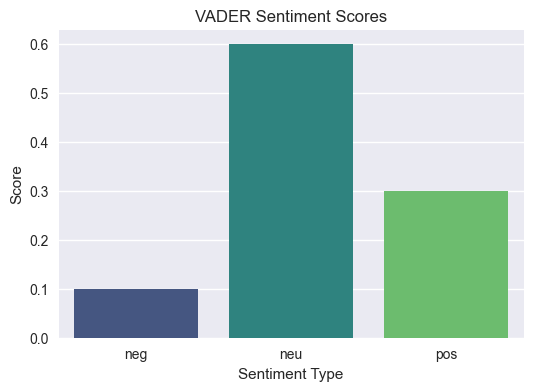

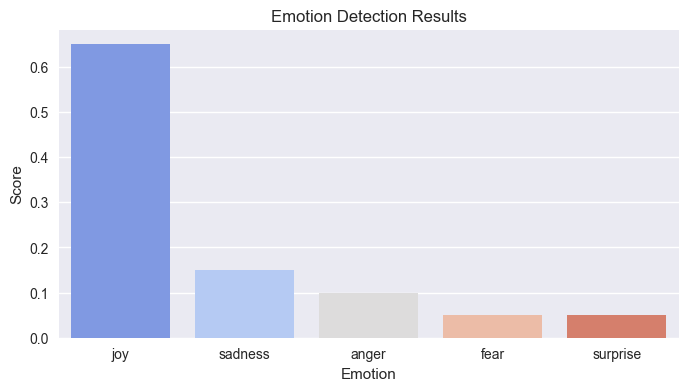

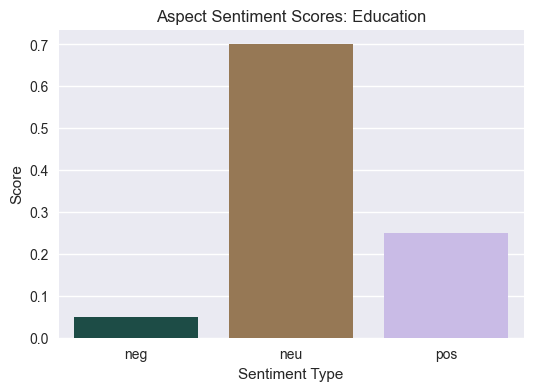

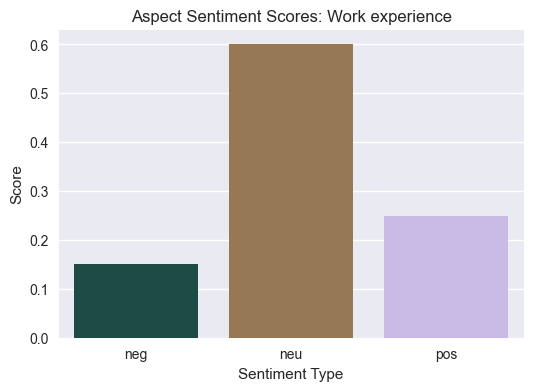

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example VADER sentiment scores
vader_results = {'neg': 0.1, 'neu': 0.6, 'pos': 0.3, 'compound': 0.2}

# Example Emotion Detection Results
emotion_results = [
    {'label': 'joy', 'score': 0.65},
    {'label': 'sadness', 'score': 0.15},
    {'label': 'anger', 'score': 0.1},
    {'label': 'fear', 'score': 0.05},
    {'label': 'surprise', 'score': 0.05},
]

# Aspect-Based Sentiment Results
aspect_sentiments = {
    "education": {'neg': 0.05, 'neu': 0.7, 'pos': 0.25, 'compound': 0.4},
    "work experience": {'neg': 0.15, 'neu': 0.6, 'pos': 0.25, 'compound': 0.2},
}

# VADER Visualization
def plot_vader_sentiment(vader_results):
    labels = list(vader_results.keys())[:-1]  # Exclude 'compound' for this plot
    scores = [vader_results[label] for label in labels]

    plt.figure(figsize=(6, 4))
    sns.barplot(x=labels, y=scores, palette="viridis")
    plt.title("VADER Sentiment Scores")
    plt.ylabel("Score")
    plt.xlabel("Sentiment Type")
    plt.show()

# Emotion Visualization
def plot_emotion_results(emotion_results):
    labels = [result['label'] for result in emotion_results]
    scores = [result['score'] for result in emotion_results]

    plt.figure(figsize=(8, 4))
    sns.barplot(x=labels, y=scores, palette="coolwarm")
    plt.title("Emotion Detection Results")
    plt.ylabel("Score")
    plt.xlabel("Emotion")
    plt.show()

# Aspect-Based Sentiment Visualization
def plot_aspect_sentiments(aspect_sentiments):
    for aspect, sentiment_scores in aspect_sentiments.items():
        labels = list(sentiment_scores.keys())[:-1]  # Exclude 'compound'
        scores = [sentiment_scores[label] for label in labels]

        plt.figure(figsize=(6, 4))
        sns.barplot(x=labels, y=scores, palette="cubehelix")
        plt.title(f"Aspect Sentiment Scores: {aspect.capitalize()}")
        plt.ylabel("Score")
        plt.xlabel("Sentiment Type")
        plt.show()

# Call Visualization Functions
plot_vader_sentiment(vader_results)
plot_emotion_results(emotion_results)
plot_aspect_sentiments(aspect_sentiments)
